<a href="https://colab.research.google.com/github/sofiane1010/SIC_checkpoints/blob/main/Checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

##Loading the data

In [88]:
data = pd.read_csv("titanic-passengers.csv", sep=";")

##Analyzing the data

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Our data are presented in 12 columns.
- "Survived" is the target of our dataset, and the 11 other columns are features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


- Total samples is 891
- 6 features are described by numbers, the other 6 are strings (DType = Object)
- Three features are missing data; Age, Cabin and Embarked. As embarked have more than 75% samples missing.

In [ ]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 75% of passengers paid less than 31\$, whereas a significant variation with few passengers is noticeable. That is, the 0.3% highest fees exceeded 500\$.
- At least 75% of passengers didn't have their parents nor their children on board.
- 68% of passengers didn't have spouses or siblings on board.
- More than 95% of passengers are younger than 55.
- 55% of passengers traveled in third class, 20% in second class, and 25% in first class.
- More than 55% of passengers are traveling the third class, whereas 24% of them are found in first class, and 21% in second class.

In [ ]:
data.describe(include=["O"])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Frost, Mr. Anthony Wood ""Archie""",male,CA. 2343,G6,S
freq,549,1,577,7,4,644


- "Survived" is a two-states categorical variable with "Yes" or "No" values.
- 38% of passengers did survive.
- The "Sex" variable is a two-states categorical variable with "male", "female".
- 65% of passengers are males.
- "Tickets" aren't unique in the dataset. (only 681 unique from 891 sample).
- "Cabin" contains 77% of missing values. and contains a lot of duplicates, which can be interpreted by saying that passenger shared cabins.
- "Embarked" has two missing values.
-"Embarked" is a three-states categorical variable with "S", "C" and "Q" ports. With S port being the most used one.

## Dealing with missing values

Let's start with the "Cabin" column. As we said earlier, this column presents more than 77% of missing values. Therefore, this columns has to be dropped. 

In [89]:
data.drop("Cabin", axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


Now, let's fill the missing values of the "Embarked" column with its mode

In [90]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
print("Missing 'Embarked' values:", data["Embarked"].isnull().sum())
data["Embarked"].value_counts()

Missing 'Embarked' values: 0


S    646
C    168
Q     77
Name: Embarked, dtype: int64

Finally, we get to the Age column. Which is a very important column as it contains crucial patterns of our dataset. In order to fill out the missing values properly, we will need to explore our dataset looking for correlations between the Age and some other features.

In [ ]:
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


Notice that "Pclass", "SibSp" and "Parch" have the highest correlations with "Age". Thus, we will consider these columns in the process of filling the missing values of the "Age" column.

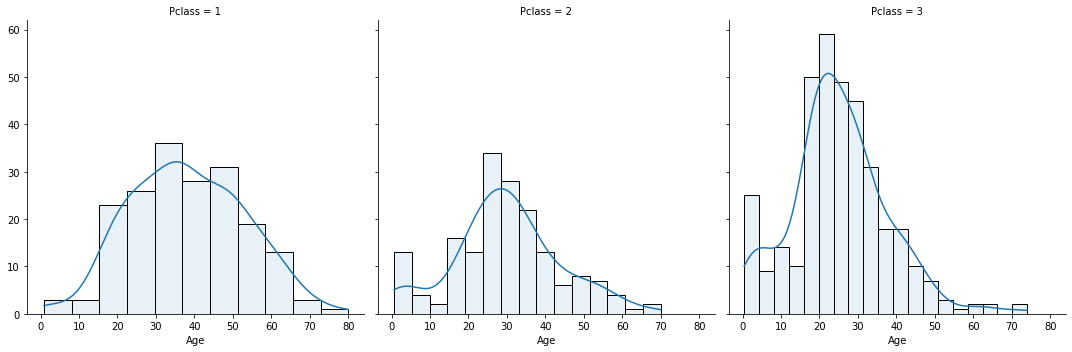

In [ ]:
g = sns.FacetGrid(data, col='Pclass', height=5)
g = g.map(sns.histplot, "Age", alpha=0.1, kde=True)

According to the Age distribution in the three classes, we can see that most of passengers in first class are older than 30, whereas passengers in third class are mostly younger than 30. And second class passengers are between the two.

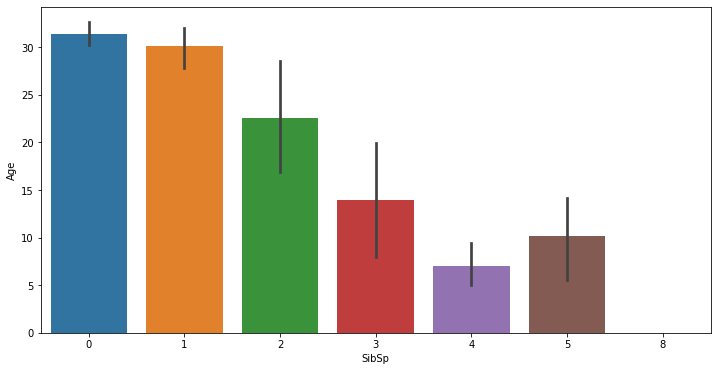

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="SibSp", y="Age" ,data=data)

From the plot above, we can see that the average age varies with the number of siblings and spouses:
- Passengers with most siblings are most probably children with lots of brothers and sisters who are traveling with their families.
- Passengers with 0 or 1 siblings are either traveling alone or with their spouse, so they will probably be adults.
- The missing category ("SibSp"=8) will be replaced with the average of three random values between [ median-std ; median+std ] of the last three categories ("SibSp"=3,4,5).

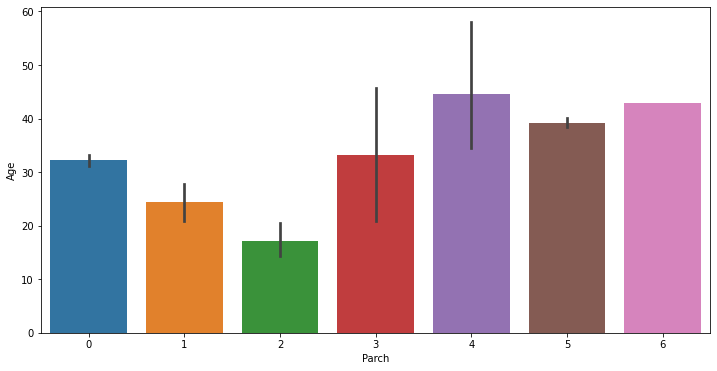

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Parch", y="Age", data=data)

Finally, for the "Parch" variable, we can see that the age varies as expected for different "Parch" categories:
- Passengers tarveling with more than 3 "Parch" are most certainly traverling with their children, and therefore, they're adult passengers.
- Passengers traveling with 0 "Parch" aren't traveling with their parents, so they most of the time aren't children.
- Passengers traveling with 2 "Parch" are likely traveling with their parents so they are mostly children.

Before we can merge all these correlations together, we're going to need to fill out the missing age values of the passengers with 8 siblings. As mentionned earlier, we will be replacing the missing values with the average of three numbers corresponding to random ages located between the first and the third quartile of the age distribution for SibSp=3,4,5.

In [91]:
med_age = data.groupby("SibSp")["Age"].median()
std_age = data.groupby("SibSp")["Age"].std()

def avr_8():
  avr_3 = np.random.randint(med_age[3]-std_age[3], med_age[3]+std_age[3])
  avr_4 = np.random.randint(med_age[4]-std_age[4], med_age[4]+std_age[4])
  avr_5 = np.random.randint(med_age[5]-std_age[5], med_age[5]+std_age[5])
  return round((avr_3 + avr_4 + avr_5) / 3, 2)

In [92]:
data.loc[data['SibSp']==8, "Age"] = data.loc[data['SibSp']==8, "Age"].apply(lambda x: avr_8())

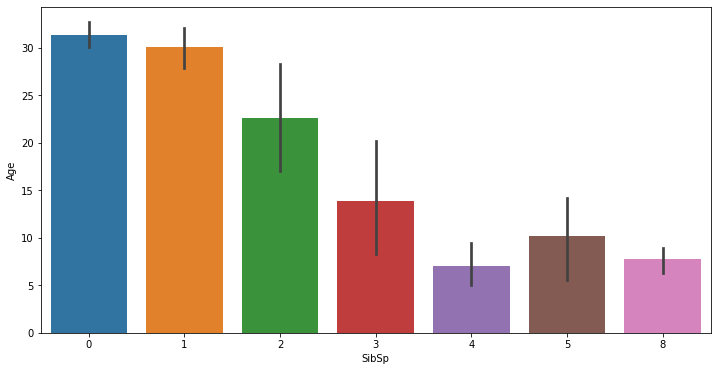

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(x="SibSp", y="Age" ,data=data)

Now, let's visualize the correlation of all these features combined with the Age feature.

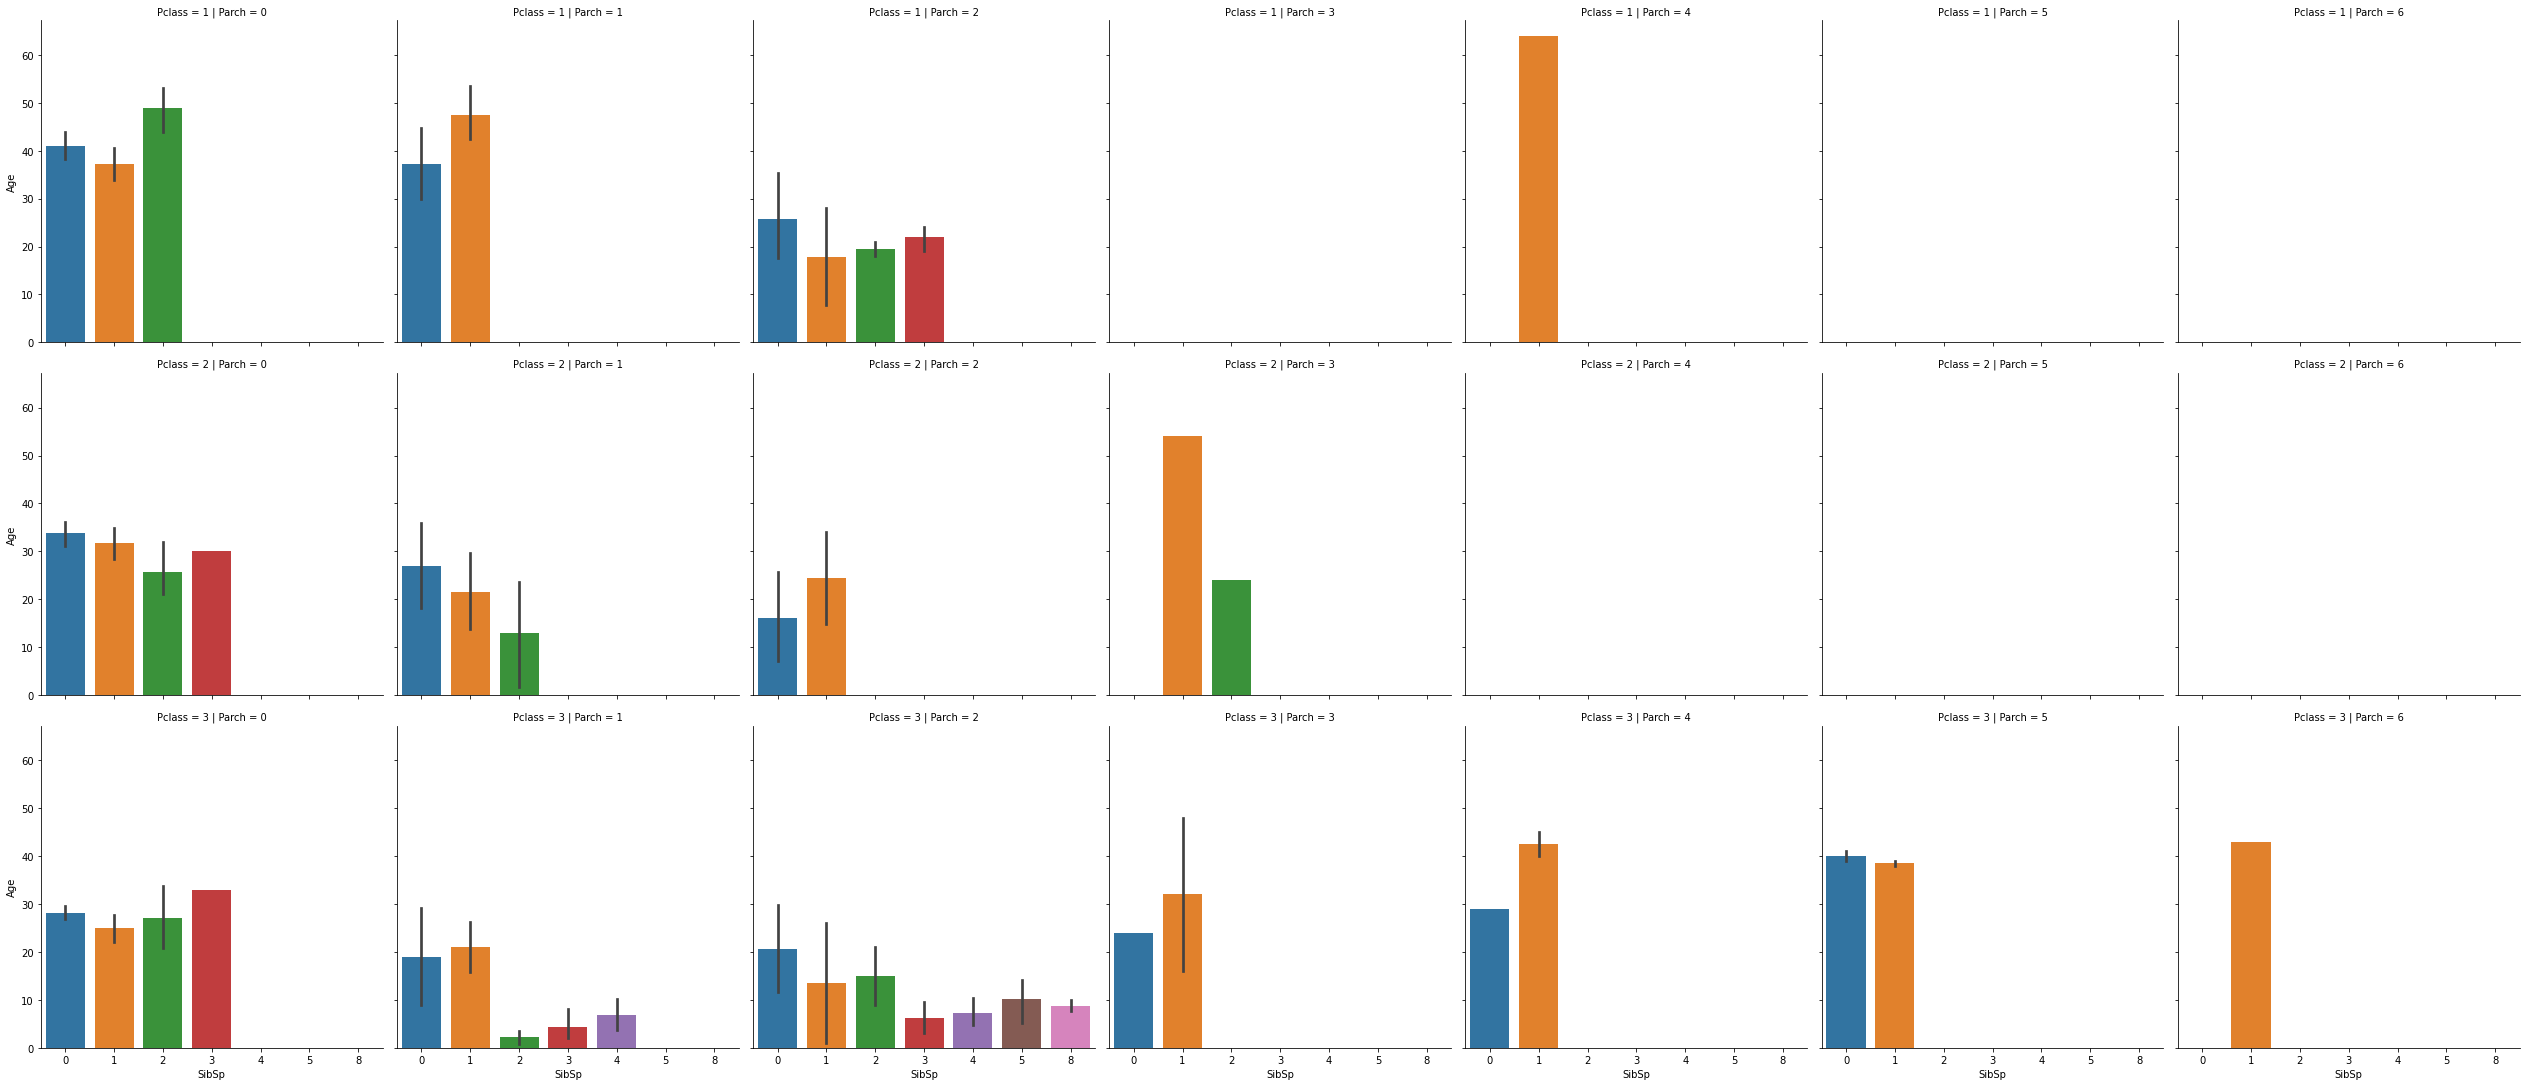

In [ ]:
g = sns.catplot(data=data, row="Pclass", col="Parch", x="SibSp", y="Age", kind="bar")

We can confirm some of our assumptions from this plot:
- Passengers traveling in first class are for most part the oldest, whereas passengers traveling in third class are the youngest.
- Passengers with more than 3 siblings have all 2 Parch, so they definitely are brothers and sisters with thier parents, which explains why they're young.
- Passengers with 2 Parch are the yougest aboard.
- Passengers with no Parch are all adult.
- passengers with more than 2 Parch are all adult, which confirms our assumption of these passengers having children. 

We will replace the missing ages by considering what we saw above:

In [94]:
median_ages = data.groupby(["SibSp", "Parch", "Pclass"])["Age"].median()
std_ages = data.groupby(["SibSp", "Parch", "Pclass"])["Age"].std()

In [95]:
for idx, row in data.isnull().iterrows():
  if row["Age"]: data.loc[idx, "Age"] = np.random.randint(
      median_ages[data.loc[idx, "SibSp"], data.loc[idx, "Parch"], data.loc[idx, "Pclass"]] - std_ages[data.loc[idx, "SibSp"], data.loc[idx, "Parch"], data.loc[idx, "Pclass"]], 
      median_ages[data.loc[idx, "SibSp"], data.loc[idx, "Parch"], data.loc[idx, "Pclass"]] + std_ages[data.loc[idx, "SibSp"], data.loc[idx, "Parch"], data.loc[idx, "Pclass"]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Our data is now complete and ready to be treated.

## Extracting relevant features

In this part, we will look for correlations between our target and our different features in order to decide which features will be included in our model.

We start with the sex and the age:

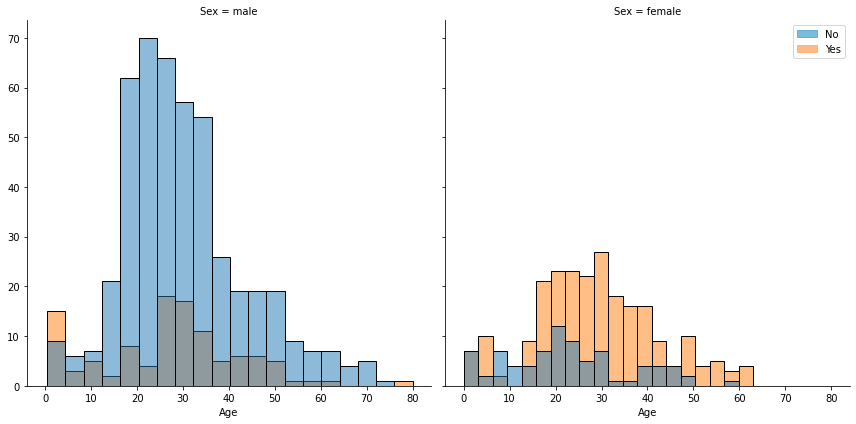

In [ ]:
g = sns.FacetGrid(data, col="Sex", height=6)
g = g.map_dataframe(sns.histplot, "Age", hue="Survived", bins=20)

survived_legend = { 'No':   '#3897c7A5', 'Yes':   '#ffb073E0' }
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in survived_legend.items()]
matplotlib.pyplot.legend(handles=patches)

From the histograms above, we can do some observations :
- Sex feature is a crucial one as it gives us lots of information about the survival of passengers.
- Females had more chances to survive than males as the crew gave priority to female passengers to leave on rescue boats.
- Males have a survival rate of 19%.
- Females have a survival rate of 74%.
- The age feature matters in determining the survival of passengers.
- Children have a survival rate of 61% (Age < 7)
- The oldest person aboard survived (Age = 80)
- Male passengers withing an age range of [15;35] have les than 15% chance of survival.
- In addition to the 80 years old passenger, male passengers younger than 4 are the only male passengers with more than 50% chances of survival.
- Female passengers withing an age range of [15;45] have a survival rate higher than 76%.

Conclusion:
  The Sex and Age features can be determinant parameters when predicting the survival of a passenger. These will be included in the model.

Other important features could be Fare, Pclass and possibly, Embarked.
Let's start with the Fare:

(0.0, 250.0)

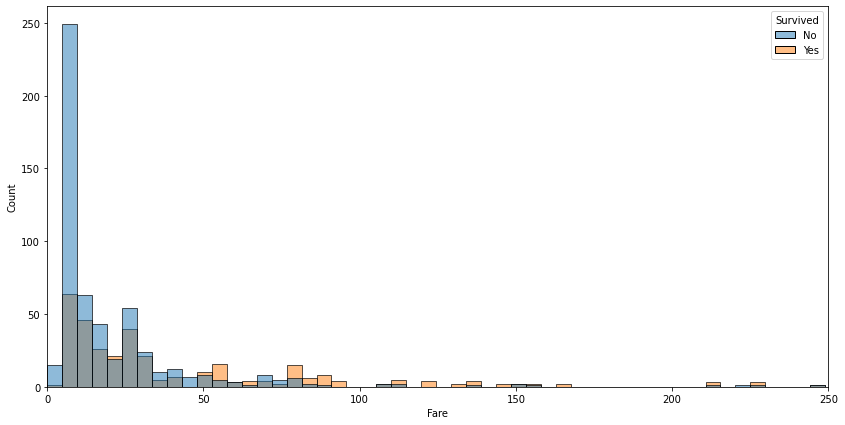

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(x="Fare", hue="Survived", data=data)
plt.xlim(0,250)

As expected, passengers with higher fares are much more likely to survive:
- Passengers paying more than 200\$ have a survival rate of 78\%.
- Passengers paying more than 50\$ have a survival rate of 68\%.
- Passengers paying less than 10\$ have a survival rate of less than 20%.

Conclusion : The Fare is an important feature for the model, it should be included.

What about the Pclass ?

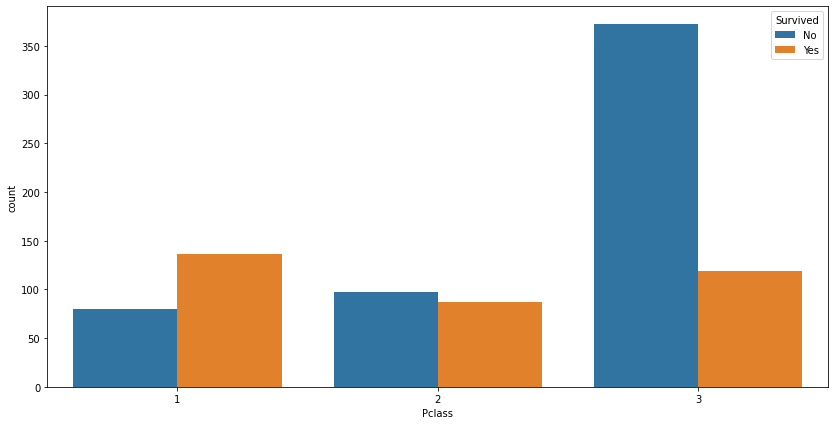

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x="Pclass", hue='Survived', data=data)

We can clearly see that Pclass is highly correlated with Survival as the survival rate of passengers is extremely affected by the Pclass they were in:
- Passengers traveling the first class have a survival rate of 63%.
- Passengers traveling the first class have a survival rate of 47%.
- Passengers traveling the first class have a survival rate of 24%.

It is expected, as passengers traveling in first class paid bigger fares and therefore, they have priority to be saved. However, there are some passengers who had 0 fares for some reason (an invitation for example) and who landed in first class. Those passengers didn't survive for most of them.

Conclusion: The fare parameter was more taken into consideration than the Pclass.

In [ ]:
data.loc[data["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
200,733,No,2,"Knight, Mr. Robert J",male,38.0,0,0,239855,0.0,S
204,598,No,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
288,303,No,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
388,675,No,2,"Watson, Mr. Ennis Hastings",male,35.0,0,0,239856,0.0,S
521,823,No,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S
544,272,Yes,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
567,482,No,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.0,0,0,239854,0.0,S
612,807,No,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S
648,467,No,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,S
675,180,No,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S


Nonetheless, for most cases, the Fare is high for first class and low for third class. As we can see below, the fare distribution over the different classes is as expected.

In [ ]:
data.groupby("Pclass")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Now, let's have a look at the Embarked feature:

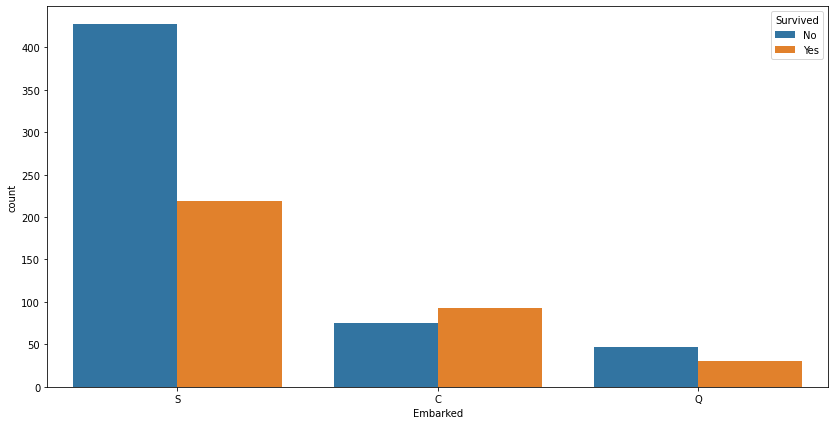

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x="Embarked", hue='Survived', data=data)

Unexpectedly, the embarkation port seems to have an impact on the survival of passengers, we note the following observations : 
- Most passengers embarked from port S, and they have a survival rate of 34%.
- Passengers who embarked from port C have a survival rate of 55%.
- Passengers embarking from port Q have a survival rate of 39%.

One assumption to make is that these ports are from different cities, and possibly, port C is located in a big city where people tend to be more wealthy than average, and thus, having the privilege to be in first class where the survival rate is high.

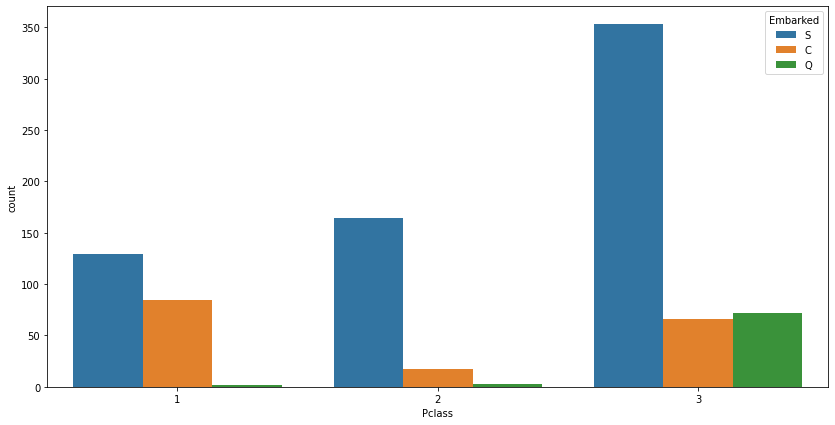

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x="Pclass", hue="Embarked", data=data)

As expected, 51% of passengers embarking from port C are in first class. Whereas 55% of passengers embarking from port S are in third class, and 93% of passengers who embarked from port Q are in third class as well. Which explains the different survival rates we saw for different embarkation ports.

As a result, we will consider including Fare, Pclass and the Embarked features to our model.

## The correlation heatmap

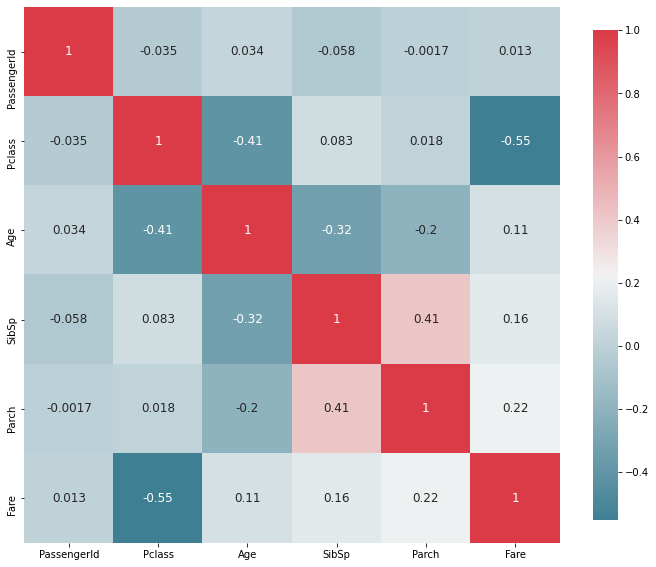

In [96]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(data)

Function analysis:
- Calculating the correlation between features.
- Creating a figure using subplots and defining its size.
- choosing a color palette for the heatmap using the diverging_palette method.
- Plotting a heatmap describing the correlation calculated before using the following parameters :
  - cmap: is the color map, we will use the color palette chosen earlier.
  - square: allow the cells to be squared.
  - cbar_kws: allow the styling of the color bar.
  - ax: defined in which axis of the figure the heatmap will be drawn.
  - annot_kws: allow the styling of the annotations (the numbers in the cells).

Analyzing the correlation:

The heatmap above describes the linear correlation between features. It varies from -1 to 1, as -1 represents a perfect negative correlation and 1 a perfect positive correlation. The closer the absolute value of the correlation gets to 1, the more correlated the two features are. We can see that "Fare" and "Pclass" are the most correlated paire, negatively because passengers of first class are the ones who pay more. We do also notice a moderate correlation between "SibSp" and "Parch", as well as the "Age" with the "Pclass" and "SibSp".

Viewing the relationship between Pclass and Survived using the groupby method to calculate the correlations :

In [97]:
cleanup = {"Survived": {
    "No": 0,
    "Yes": 1
}}
data.replace(cleanup, inplace=True)

In [ ]:
data.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Creating new features

Creating the Title feature:

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [98]:
def name_to_title(name):
  return name.split(",")[1].strip().split(".")[0]

data["Title"] = data["Name"].apply(name_to_title)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


As expected, we find the survival rates presented before.

In [ ]:
data.groupby("Title")["Sex"].describe()

,count,unique,top,freq
Title,,,,
Capt,1,1,male,1
Col,2,1,male,2
Don,1,1,male,1
Dr,7,2,male,6
Jonkheer,1,1,male,1
Lady,1,1,female,1
Major,2,1,male,2
Master,40,1,male,40
Miss,182,1,female,182


Except for Dr Title, which had 1 female and 6 males, all other titles grouped either females or males but never both of them.

In [ ]:
data.groupby("Title")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.00,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dr,7.0,42.142857,10.976165,23.00,37.50,44.0,49.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0
Master,40.0,5.300000,4.721143,0.42,1.00,4.0,9.00,22.0
Miss,182.0,21.620879,12.423457,0.00,15.00,21.0,29.75,63.0


The concentration of ages among the Titles is very high as we can notice a relatively small standard deviation.

Although this new feature appears to be very informative, it still has a lot of categories which makes it difficult to extract relationships between the features and even the correlation with the target. Therefore, we are going to group some categories together.

In [99]:
Title_Dictionary = {
                    "Capt": "Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                      "Dr": "Officer",
                    "Rev": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir" : "Royalty",
                   "Lady" : "Royalty",
                  "the Countess":"Royalty",
                    "Dona": "Royalty",
                    "Mme": "Miss",
                    "Mlle": "Miss",
                    "Miss": "Miss",
                    "Ms": "Mrs",
                    "Mr": "Mrs",
                    "Mrs": "Mrs",
                    "Master": "Master"
                    }

cleanup = {"Title": Title_Dictionary}
data.replace(cleanup, inplace=True)

In [12]:
data["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

Now let's try to extract relationships based on this version of Title:

In [ ]:
data.groupby(["Title", "Sex"])["Survived", "Pclass"].mean().unstack()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Survived              Pclass          
Sex        female      male    female      male
Title                                          
Master        NaN  0.575000       NaN  2.625000
Miss     0.702703       NaN  2.286486       NaN
Mrs      0.793651  0.156673  2.000000  2.410058
Officer  1.000000  0.235294  1.000000  1.470588
Royalty  1.000000  0.333333  1.000000  1.000000

In [ ]:
data.groupby(["Title"])["Survived"].mean()

Title
Master     0.575000
Miss       0.702703
Mrs        0.281493
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64

From the plot above, we can observe: 
- Females traveled on average on better Pclasses.
- Female passengers have very high survival rate especially for "Royalty" and "Officer" titles which have 100% survival rate.

From what we saw, we decide to include the Title to our model.

Now let's create a feature "FamilySize" which will tell the size of a passenger's family

In [100]:
data["FamilySize"] = data["Parch"] + data["SibSp"] + 1

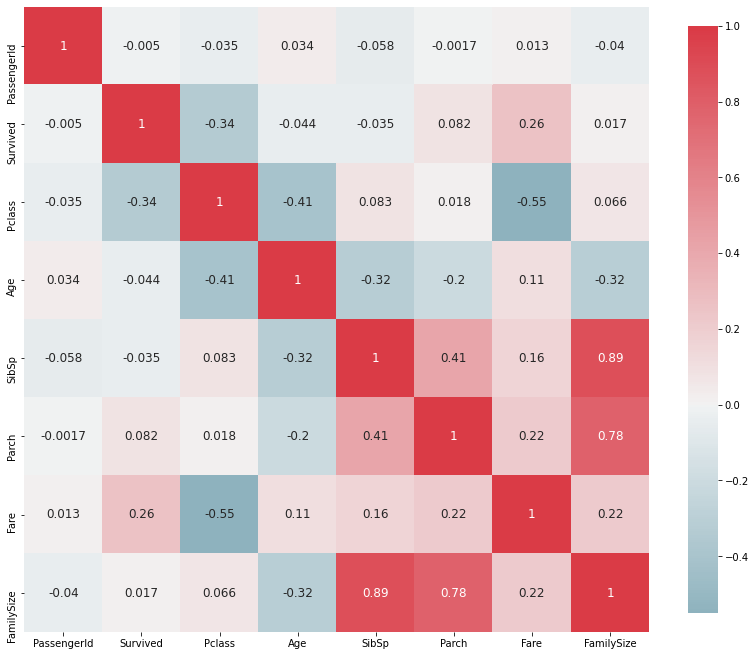

In [101]:
s, ax = plt.subplots(figsize=(14,12))
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(data.corr(), cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, annot = True, annot_kws = { 'fontsize' : 12 }, center=0)

There's a serious correlation between SibSp , Parch and FamilySize. Which is quite logical since FamilySize is extracted from the other two. However, since they're strongly correlated, it is better if we get rid of SibSp and Parch. Actually, we will drop all the useless features now :

## Features selection

In [102]:
data.drop(["PassengerId", "Name", "Parch", "Ticket", "SibSp"], axis=1, inplace=True)

In [103]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,1
1,0,3,male,25.0,7.6500,S,Mrs,1
2,0,3,male,20.0,7.8542,S,Mrs,1
3,0,3,female,29.0,21.0750,S,Mrs,5
4,0,1,male,31.0,52.0000,S,Mrs,2


# data transformation and logistic regression application

finding the values to transform of our categorical data

In [104]:
print(data["Title"].unique())
print(data["Embarked"].unique())
print(data["Sex"].unique())

['Mrs' 'Miss' 'Officer' 'Royalty' 'Master']
['S' 'C' 'Q']
['male' 'female']


categorical data transformation

In [105]:
cleanup = {
    "Title": {"Mrs" : 1, "Miss" : 2, "Officer" : 3, "Royalty" : 4, "Master" : 5},
    "Embarked" : {"S" : 1, "C" : 2, "Q" : 3},
    "Sex": {"male" : 1, "female" : 2},
}
data.replace(cleanup, inplace=True)

In [106]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,1,1,1
1,0,3,1,25.0,7.6500,1,1,1
2,0,3,1,20.0,7.8542,1,1,1
3,0,3,2,29.0,21.0750,1,1,5
4,0,1,1,31.0,52.0000,1,1,2


logistic regression application

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

x = data[['Sex','Age', "Title", "FamilySize", 'Fare', 'Pclass', "Embarked"]]
y = data['Survived']

# splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, shuffle=True)

# scaling the features
scaler_train = preprocessing.StandardScaler().fit(x_train)
scaler_test = preprocessing.StandardScaler().fit(x_test)

x_train = scaler_train.transform(x_train)
x_test = scaler_test.transform(x_test)

# training the model
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)

# predicting the outputs
y_pred  = logreg.predict(x_test)

# accuracy evaluation
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.85


Evaluation of our model with the confusion matrix

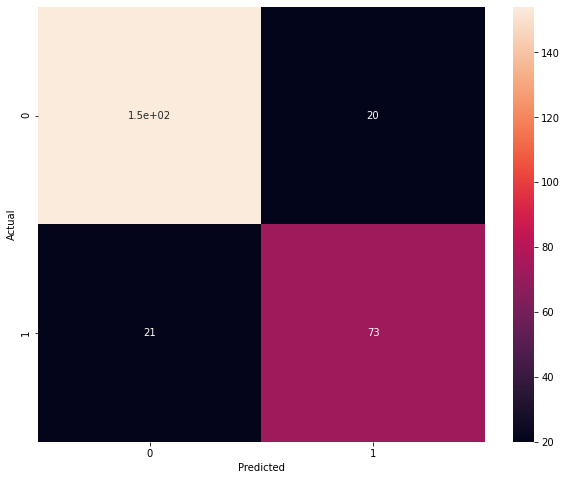

In [151]:
plt.figure(figsize=(10,8))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

we can see that true negative predictions are very important, followed by the true positive predictions, and then relatively low values for the false negative and false positive predictions.

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       174
           1       0.78      0.78      0.78        94

    accuracy                           0.85       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268



Evaluating our model using the roc curve

Threshold: [2 1 0]
 


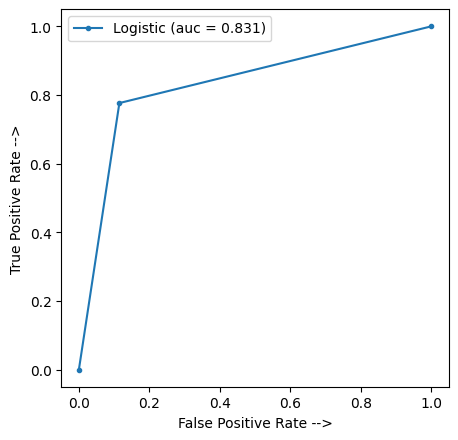

In [148]:
from sklearn.metrics import roc_curve, auc

fp,tp, threshold = roc_curve(y_test, y_pred)
auc = auc(fp, tp)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fp, tp, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

we see that the area under the curve of our roc plot is 0.83 which corresponds to the accuracy of our modell. Also, we can determine the (0.1, 0.78) as optimal for our model.